# Simple Linear Regression Project




## Python libraries

 •	Numpy – It provides a fast numerical array structure and operating functions.
 
 •	pandas – It provides tools for data storage, manipulation and analysis tasks.
 
 •	Scikit-Learn – The required machine learning library in Python.
 
 •	Matplotlib – It is the basic plotting library in Python. It provides tools for making plots. 


In [42]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# The above command sets the backend of matplotlib to the 'inline' backend. 
# It means the output of plotting commands is displayed inline.

## About the dataset

The data set has been imported from the website with the following url:-

https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv





In [43]:
# Import the data

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
df = pd.read_csv(url)

In [44]:
# Exploratory data analysis

# View the dimensions of df

print(df.shape)

(244, 7)


### pandas head() method

I viewed the top 5 rows of the pandas dataframe with the pandas head() method.

In [45]:
# View the top 5 rows of df

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### pandas columns attribute

Reading column labels of the dataframe with the columns attribute.

In [46]:
# Rename columns of df dataframe

df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [50]:
# Check for missing values
print(df.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


### pandas info() method

I viewed the summary of the dataframe with the pandas info() method.

In [51]:
# View dataframe summary

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


### pandas describe() method

I look at the descriptive statistics of the dataframe with the pandas describe() method.

In [48]:
# View descriptive statistics

print(df.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


## Visual exploratory data analysis

I visualize the relationship between X(total-bill) and y(tip) by plotting a scatterplot.

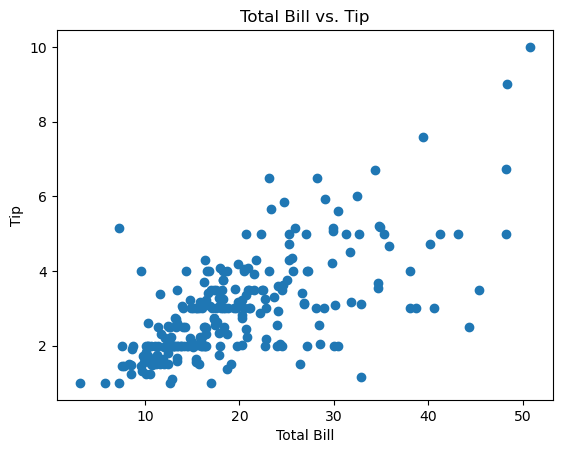

In [54]:
# Plot scatter plot between X and y

import matplotlib.pyplot as plt

# Scatter plot of total_bill vs. tip
plt.scatter(df['total_bill'], df['tip'])
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs. Tip')
plt.show()

## Checking dimensions of X and y

We need to check the dimensions of X and y to make sure they are in right format for Scikit-Learn API. 

It is an important precursor to model building. 

In [56]:
# Print the dimensions of X and y
X = df['total_bill'].values
y = df['tip'].values

print(X.shape)
print(y.shape)

(244,)
(244,)


## Reshaping X and y

Since we are working with only one feature variable, so we need to reshape using Numpy reshape() method.

It specifies first dimension to be -1, which means "unspecified".

Its value is inferred from the length of the array and the remaining dimensions.


In [57]:
# Reshape X and y

X = X.reshape(-1,1)
y = y.reshape(-1,1)


In [58]:
# Print the dimensions of X and y after reshaping

print(X.shape)
print(y.shape)


(244, 1)
(244, 1)


## Difference in dimensions of X and y after reshaping


We can see the difference in diminsions of X and y before and after reshaping.


## Train test split


I split the dataset into two sets namely - train set and test set.

The model learn the relationships from the training data and predict on test data.


## Mechanics of the model


I split the dataset into two sets – the training set and the test set. Then, I instantiate the regressor **model** and fit it on the training set with the fit method. 

In this step, the model learned the relationships between the training data (X_train, y_train). 

Now the model is ready to make predictions on the test data (X_test). Hence, I predict on the test data using the predict method. 


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the dataset into training and testing sets
X = df[['total_bill']]
y = df['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)



LinearRegression()

## Making predictions


I have predicted the bill values on first five 5 Billing datasets by writing code


		model.predict(X) [0:5]  
        

If I remove [0:5], then I will get predicted total_bill values for the whole Billing dataset.


To make prediction, on an individual bill value, I write


		model.predict(Xi)
        

where Xi is the billing data value of the ith observation.



In [105]:
#Predict on the test data
# model.predict(X) [0:5] 

y_pred=model.predict(X_test)
print(y_pred)

[3.04525623 1.86330727 3.55119456 3.69452593 2.31576375 2.83881627
 3.96728338 2.26014262 2.50615915 2.57033737 2.88160176 2.07723468
 2.06439904 2.47407003 2.00236009 2.91903905 2.92652651 3.23351235
 2.68478854 5.33107064 3.13831465 3.13403611 2.4558862  1.94673896
 3.16077703 2.17564129 2.02375283 3.62927807 2.68906708 6.07767732
 4.99734388 1.75313465 2.83025918 3.09552917 2.74040966 3.50092162
 2.21200895 5.53644096 2.33287794 3.35010279 2.04942412 2.47834858
 3.48701634 2.03017065 2.03124029 1.25361414 2.05798121 2.92438724
 1.73388118]


## Model Evaluation
We'll evaluate the model's performance using metrics such as Mean Squared Error (MSE) and R-squared. We'll also compare the predicted values with the actual values.

In [106]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.5688142529229538
R-squared: 0.5449381659234664


## Plotting the predicted and tested values:

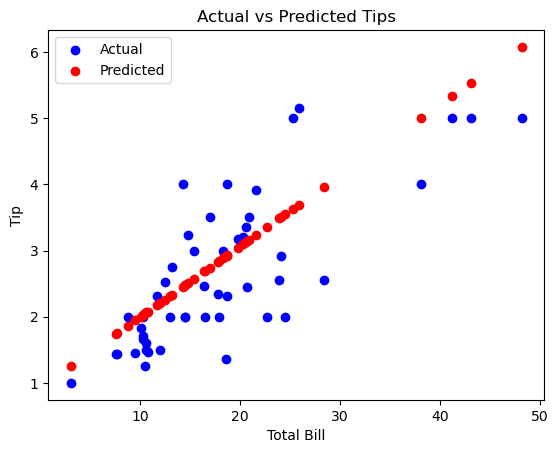

In [111]:
# Plot the actual vs predicted values
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Actual vs Predicted Tips')
plt.legend()
plt.show()

In [112]:
# Compute model slope and intercept

a = model.coef_
b = model.intercept_,
print("Estimated model slope, a:" , a)
print("Estimated model intercept, b:" , b) 

Estimated model slope, a: [0.10696371]
Estimated model intercept, b: (0.9252355585570555,)


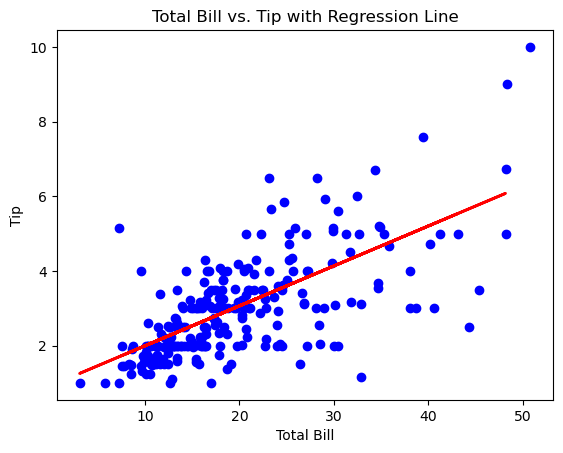

In [113]:
plt.scatter(df['total_bill'], df['tip'], color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs. Tip with Regression Line')
plt.show()